# Sommaire :
<br>1 - Revue d'erreurs signalées par Excel
<br>2 - <a href="#E1">L'ENERGYSTARScore et sa certification</a>
<br>3 - <a href="#E2">Les incohérences dans les données de surface</a>
<br>4 - <a href="#E3">Les émissions de 'GHG'</a>
<br>5 - <a href="#E4">Sélection des 'individus' pour l'étude</a>
<br>6 - <a href="#E5">Les consommations énergétiques</a>

In [1]:
import pandas as pd
data = pd.read_csv('2016_Building_Energy_Benchmarking.csv')
data.shape

(3376, 46)

In [2]:
# recherche des erreurs signalées lors de l'importation du fichier dans Excel :
data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [3]:
data['TaxParcelIdentificationNumber'][3130:3140]

3130                   0225049077
3131                   0225049077
3132                   0225049077
3133                   5247800440
3134    6850700316 and 6850700315
3135                   5036300165
3136                   7666203010
3137                   7660600235
3138                   0164000222
3139                   0164000222
Name: TaxParcelIdentificationNumber, dtype: object

In [4]:
# pas de souci, la nature du champ est du texte. Autre cas :
data.loc[3192][0:10]

OSEBuildingID                                   49737
DataYear                                         2016
BuildingType                           NonResidential
PrimaryPropertyType                      Retail Store
PropertyName                           MARQUEEN / MQH
Address                          600 Queen Anne Ave N
City                                          Seattle
State                                              WA
ZipCode                                       98109.0
TaxParcelIdentificationNumber             701100-0000
Name: 3192, dtype: object

In [5]:
# peut être un problème pour ce 'TaxParcelIdentificationNumber', mais pas technique pour le moment ...
data.loc[3269][0:10]

OSEBuildingID                                   49947
DataYear                                         2016
BuildingType                     Multifamily MR (5-9)
PrimaryPropertyType              Mid-Rise Multifamily
PropertyName                        WA023_AVA Ballard
Address                              5555 14th AVE NW
City                                          Seattle
State                                              WA
ZipCode                                       98107.0
TaxParcelIdentificationNumber             276810-0400
Name: 3269, dtype: object

In [6]:
# Idem. Autre champ avec quelques souci :
data['SecondLargestPropertyUseTypeGFA'][215:225]

215    123356.000000
216     10058.000000
217      7000.000000
218              NaN
219      3291.899902
220     83311.000000
221    272682.000000
222    107667.000000
223      1392.000000
224     15401.000000
Name: SecondLargestPropertyUseTypeGFA, dtype: float64

In [7]:
# L'erreur selon Excel est sur le 219 : il a une partie décimale non nulle
3291.899902 // 1

3291.0

In [8]:
data.loc[~(data['SecondLargestPropertyUseTypeGFA'].isna()) & \
         (data['SecondLargestPropertyUseTypeGFA'] // 1 != data['SecondLargestPropertyUseTypeGFA']), \
         'SecondLargestPropertyUseTypeGFA']

219     3291.899902
387    77887.796880
446     2689.600098
Name: SecondLargestPropertyUseTypeGFA, dtype: float64

In [9]:
# pas de contradiction avec la description du champ, on laisse ainsi.
# troisième type d'erreur :
data['YearsENERGYSTARCertified'][230:250]

230    2016201520142013201220112010200920082007200620...
231                                         201520142013
232                                                  NaN
233                         2014201320112010200920082007
234                                                  NaN
235                                                  NaN
236                                                  NaN
237                                                  NaN
238                                                  NaN
239                                                  NaN
240                                     2016201520142013
241                                                  NaN
242                         2017201620152014201320112008
243                             201720162015201420132008
244                                                  NaN
245                                 20162015201320122010
246                                                  NaN
247                            

Ce champs est supposé numérique, mais comme il accumule les années, ça fait vraiment des grands nombres ! Il va falloir trouver une autre façon de traiter cette information : sous forme de chaine avec un séparateur entre les années, i.e. tous les quatres chiffres.

In [2]:
def YearsList(entry) :
    years = []
    for i in range(int(len(entry) / 4)) :
        years.append(entry[4*i : 4*(i+1)])
    newyears = ''
    for i in range(int(len(years))):
        newyears = newyears + years[i] + '|'
    newyears = newyears[0:len(newyears)-1] # suppression séparateur finale
    return newyears


In [3]:
YearsList('2017201620152014201320112008')

'2017|2016|2015|2014|2013|2011|2008'

In [4]:
YearsList('2017')

'2017'

In [3]:
for i in range(len(data)) :
    if str(data['YearsENERGYSTARCertified'][i]) == 'nan' :
        continue
    else :
        data.iloc[i,27] = YearsList(str(data.iloc[i,27]))


In [5]:
data['YearsENERGYSTARCertified'][230:250]

230    2016|2015|2014|2013|2012|2011|2010|2009|2008|2...
231                                       2015|2014|2013
232                                                  NaN
233                   2014|2013|2011|2010|2009|2008|2007
234                                                  NaN
235                                                  NaN
236                                                  NaN
237                                                  NaN
238                                                  NaN
239                                                  NaN
240                                  2016|2015|2014|2013
241                                                  NaN
242                   2017|2016|2015|2014|2013|2011|2008
243                        2017|2016|2015|2014|2013|2008
244                                                  NaN
245                             2016|2015|2013|2012|2010
246                                                  NaN
247                            

In [7]:
data.to_csv('2016_Building_Energy_Benchmarking.csv')

In [2]:
data['ComplianceStatus'][20:40]

20                       Compliant
21                       Compliant
22    Error - Correct Default Data
23                       Compliant
24                       Compliant
25                       Compliant
26                       Compliant
27                       Compliant
28                    Missing Data
29                       Compliant
30    Error - Correct Default Data
31                    Missing Data
32                       Compliant
33                       Compliant
34                       Compliant
35                       Compliant
36                       Compliant
37                       Compliant
38    Error - Correct Default Data
39                       Compliant
Name: ComplianceStatus, dtype: object

In [3]:
data['ComplianceStatus'].value_counts()

Compliant                       3211
Error - Correct Default Data     113
Non-Compliant                     37
Missing Data                      15
Name: ComplianceStatus, dtype: int64

In [30]:
data.loc[data['ComplianceStatus'] == 'Missing Data', ['YearsENERGYSTARCertified','ENERGYSTARScore']]

,YearsENERGYSTARCertified,ENERGYSTARScore
28,NaN,NaN
31,NaN,NaN
62,NaN,NaN
81,NaN,NaN
85,NaN,NaN
95,NaN,NaN
133,NaN,NaN
139,NaN,NaN
152,NaN,NaN
614,NaN,NaN


In [29]:
# l'individu '630' fait exception, examinons le :
data.loc[630][25:]

ThirdLargestPropertyUseType                NaN
ThirdLargestPropertyUseTypeGFA             NaN
YearsENERGYSTARCertified                  2016
ENERGYSTARScore                            NaN
SiteEUI(kBtu/sf)                           0.0
SiteEUIWN(kBtu/sf)                         0.0
SourceEUI(kBtu/sf)                         0.0
SourceEUIWN(kBtu/sf)                       0.0
SiteEnergyUse(kBtu)                        0.0
SiteEnergyUseWN(kBtu)                      0.0
SteamUse(kBtu)                             0.0
Electricity(kWh)                   420163.0938
Electricity(kBtu)                    1433596.0
NaturalGas(therms)                         0.0
NaturalGas(kBtu)                           0.0
DefaultData                              False
Comments                                   NaN
ComplianceStatus                  Missing Data
Outlier                                    NaN
TotalGHGEmissions                         9.99
GHGEmissionsIntensity                     0.18
Name: 630, dt

In [71]:
# pour être cohérent, on passe YearsENERGYSTARCertified à NaN :
import numpy
#data.loc[630].index[0] -> 'OSEBuildingID'
#data.loc[(data['ComplianceStatus'] == 'Missing Data') & (data['YearsENERGYSTARCertified'] == '2016'), \
#        'YearsENERGYSTARCertified'].index[0]
# ci-dessus retourne 630 qui n'est pas le n° de ligne permettant d'utiliser 'iloc'
data.loc[630][0]

850

In [69]:
# bizarre, d'habitude l'index permet de d'identifier correctement l'individu ...
for i in range(1500) :
    if (data.iloc[i,0] == 850) & (data.iloc[i,42] == 'Missing Data') :
        print(i)
        break


555


In [70]:
# nous l'avons identifié :
data.iloc[555,:]

OSEBuildingID                                    850
DataYear                                        2016
BuildingType                       SPS-District K-12
PrimaryPropertyType                      K-12 School
PropertyName                       Leschi Elementary
Address                                135 32nd Ave.
City                                         Seattle
State                                             WA
ZipCode                                      98122.0
TaxParcelIdentificationNumber             3416600240
CouncilDistrictCode                                3
Neighborhood                                 CENTRAL
Latitude                                     47.6021
Longitude                                 -122.29181
YearBuilt                                       1988
NumberofBuildings                                1.0
NumberofFloors                                     3
PropertyGFATotal                               55353
PropertyGFAParking                            

In [72]:
data.iloc[555,27] = numpy.NaN

In [73]:
# ouf ! verif :
data.loc[630][25:]

ThirdLargestPropertyUseType                NaN
ThirdLargestPropertyUseTypeGFA             NaN
YearsENERGYSTARCertified                   NaN
ENERGYSTARScore                            NaN
SiteEUI(kBtu/sf)                           0.0
SiteEUIWN(kBtu/sf)                         0.0
SourceEUI(kBtu/sf)                         0.0
SourceEUIWN(kBtu/sf)                       0.0
SiteEnergyUse(kBtu)                        0.0
SiteEnergyUseWN(kBtu)                      0.0
SteamUse(kBtu)                             0.0
Electricity(kWh)                   420163.0938
Electricity(kBtu)                    1433596.0
NaturalGas(therms)                         0.0
NaturalGas(kBtu)                           0.0
DefaultData                              False
Comments                                   NaN
ComplianceStatus                  Missing Data
Outlier                                    NaN
TotalGHGEmissions                         9.99
GHGEmissionsIntensity                     0.18
Name: 630, dt

In [74]:
data.loc[data['ComplianceStatus'] == 'Non-Compliant', ['YearsENERGYSTARCertified','ENERGYSTARScore']]

,YearsENERGYSTARCertified,ENERGYSTARScore
226,NaN,NaN
304,NaN,NaN
384,NaN,100.0
448,NaN,100.0
517,NaN,1.0
578,NaN,NaN
758,NaN,NaN
1229,NaN,NaN
1295,NaN,NaN
1611,NaN,100.0


Moins que les 37 annoncés parce que je reviens sur ces champs après avoir supprimé les batiments à vocation résidentielle. Ces chiffres ne nous aident pas beaucoup à appréhender l'interpretation de l'energystarscore. **Tâchons d'en savoir plus sur cette donnée :** <a name="E1">

In [75]:
data['ENERGYSTARScore'].value_counts()

100.0    36
89.0     24
96.0     24
95.0     24
88.0     23
         ..
30.0      2
4.0       2
39.0      2
28.0      2
48.0      2
Name: ENERGYSTARScore, Length: 100, dtype: int64

In [76]:
data.loc[data['ComplianceStatus'] == 'Compliant', ['YearsENERGYSTARCertified','ENERGYSTARScore']][0:20]

,YearsENERGYSTARCertified,ENERGYSTARScore
5,NaN,NaN
7,NaN,NaN
15,NaN,NaN
16,NaN,NaN
18,NaN,NaN
20,NaN,76.0
21,NaN,NaN
24,NaN,NaN
25,NaN,NaN
32,NaN,NaN


In [78]:
data.loc[data['YearsENERGYSTARCertified'].isna(), 'City'].count()  # City parce que c'est court, c'est le count() que je veux

1440

In [79]:
data.loc[data['ENERGYSTARScore'].isna(), 'City'].count()

563

In [81]:
data.loc[data['YearsENERGYSTARCertified'].isna() & data['ENERGYSTARScore'].isna(), 'City'].count()

562

In [82]:
# 563 - 562 = 1, quel est cet individu qui a une date de certification mais pas de score ?
data.loc[~data['YearsENERGYSTARCertified'].isna() & data['ENERGYSTARScore'].isna(), 'City']

3317    Seattle
Name: City, dtype: object

In [84]:
data.loc[3317][25:]

ThirdLargestPropertyUseType        Restaurant
ThirdLargestPropertyUseTypeGFA         1087.0
YearsENERGYSTARCertified                 2017
ENERGYSTARScore                           NaN
SiteEUI(kBtu/sf)                    52.099998
SiteEUIWN(kBtu/sf)                  52.099998
SourceEUI(kBtu/sf)                 153.100006
SourceEUIWN(kBtu/sf)               153.100006
SiteEnergyUse(kBtu)                18760766.0
SiteEnergyUseWN(kBtu)              18760766.0
SteamUse(kBtu)                            0.0
Electricity(kWh)                    4968672.0
Electricity(kBtu)                  16953109.0
NaturalGas(therms)                18076.54883
NaturalGas(kBtu)                    1807655.0
DefaultData                             False
Comments                                  NaN
ComplianceStatus                    Compliant
Outlier                                   NaN
TotalGHGEmissions                      214.19
GHGEmissionsIntensity                    0.42
Name: 3317, dtype: object

In [86]:
# regardons déjà les individus qui sont cohérents à ce niveau (date de derif. + score) :
data.loc[~data['YearsENERGYSTARCertified'].isna() & ~data['ENERGYSTARScore'].isna(), 'City'].count()

95

In [6]:
data.loc[~data['YearsENERGYSTARCertified'].isna() & ~data['ENERGYSTARScore'].isna(), data.columns[27:]][0:20]

,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
17,2016,97.0,30.000000,32.799999,77.800003,83.199997,1650279.25,1.802471e+06,0.000000e+00,356855.00,1217589.0,4326.897461,432690.0,False,NaN,Compliant,NaN,31.47,0.57
23,2016,78.0,56.299999,56.299999,176.600006,176.600006,9536161.00,9.536161e+06,0.000000e+00,2794888.75,9536160.0,0.000000,0.0,False,NaN,Compliant,NaN,66.48,0.40
73,2016,96.0,35.000000,38.900002,78.699997,84.400002,8355988.50,9.287467e+06,0.000000e+00,1403853.50,4789948.0,35660.394530,3566039.0,False,NaN,Compliant,NaN,222.78,0.94
93,2016,97.0,33.299999,36.099998,81.599998,85.900002,12265516.00,1.327934e+07,0.000000e+00,2404753.75,8205020.0,40604.957030,4060496.0,False,NaN,Compliant,NaN,272.85,0.74
142,2012,74.0,64.500000,64.500000,202.500000,202.500000,24755086.00,2.475509e+07,0.000000e+00,7255300.00,24755084.0,0.000000,0.0,False,NaN,Compliant,NaN,172.58,0.47
144,2017|2015,89.0,60.299999,62.400002,189.500000,195.899994,40847752.00,4.222740e+07,0.000000e+00,11969413.00,40839637.0,5382.505371,538251.0,False,NaN,Compliant,NaN,313.30,0.40
145,2017|2016|2015|2014|2013|2012|2011|2010|2009|2008,90.0,56.200001,57.400002,164.600006,168.600006,30985420.00,3.169370e+07,0.000000e+00,8172315.00,27883939.0,31014.769530,3101477.0,False,NaN,Compliant,NaN,359.11,0.48
147,2010|2009|2007,91.0,44.500000,46.500000,127.800003,130.100006,7739699.00,8.081443e+06,0.000000e+00,1974231.00,6736076.0,10036.219730,1003622.0,False,NaN,Compliant,NaN,100.26,0.49
149,2017|2010|2007,90.0,64.599998,69.500000,146.699997,151.800003,14633233.00,1.574279e+07,6.568832e+06,2363540.25,8064399.0,0.000000,0.0,False,NaN,Compliant,NaN,563.25,2.12
150,2016|2015,95.0,46.400002,46.400002,142.399994,142.399994,27018020.00,2.701802e+07,0.000000e+00,7658746.50,26131643.0,8863.726563,886373.0,False,NaN,Compliant,NaN,229.25,0.30


Ces données concernant l'ENERGYSTAR Score nous indiquent que :
<br>Plus le score est proche de 100, plus le batiment est économe, mais la valeur 100 attribuée à certains est irréaliste
<br>La grande majorité des batiments n'ont jamais été "ENERGYSTAR Certified"
<br>563 bâtiments sur 1536 non résidentiels n'ont pas d'ENERGYSTAR Score (au passage, un bon score ne signifie pas la certification)


In [7]:
data.loc[data['ENERGYSTARScore'] == 100.0, data.columns[27:]][0:20]

,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
46,NaN,100.0,32.000000,37.099998,54.000000,60.099998,6.219842e+06,7.204080e+06,0.0,5.533097e+05,1887893.0,43319.488280,4331949.0,False,NaN,Compliant,NaN,243.23,1.25
243,NaN,100.0,283.700012,283.700012,874.099976,874.099976,5.507312e+07,5.507312e+07,0.0,1.568186e+07,53506520.0,15665.939450,1566594.0,False,NaN,Compliant,NaN,456.22,1.21
244,NaN,100.0,707.299988,707.299988,2217.800049,2217.800049,7.507389e+07,7.507389e+07,0.0,2.195702e+07,74917352.0,1565.250000,156525.0,False,NaN,Compliant,NaN,530.59,2.48
290,NaN,100.0,103.199997,103.199997,323.899994,323.899994,6.522552e+06,6.522552e+06,0.0,1.911650e+06,6522551.0,0.000000,0.0,False,NaN,Compliant,NaN,45.47,0.72
292,NaN,100.0,4.300000,4.300000,9.000000,9.000000,1.396082e+06,1.396082e+06,0.0,2.054446e+05,700977.0,6951.050293,695105.0,False,NaN,Compliant,NaN,41.80,0.17
311,NaN,100.0,3.600000,4.300000,6.600000,7.400000,2.275667e+05,2.729137e+05,0.0,2.503190e+04,85409.0,1421.580078,142158.0,False,NaN,Compliant,NaN,8.15,0.13
317,NaN,100.0,4.600000,4.600000,14.300000,14.300000,3.189628e+05,3.189628e+05,0.0,9.348260e+04,318963.0,0.000000,0.0,False,NaN,Non-Compliant,Low outlier,2.22,0.03
380,NaN,100.0,58.000000,58.799999,28.000000,28.700001,1.119592e+07,1.134876e+07,0.0,4.715030e+05,1608768.0,3430.500488,343050.0,False,NaN,Non-Compliant,Low outlier,29.43,0.19
523,NaN,100.0,2.100000,2.100000,6.600000,6.600000,1.517543e+05,1.517543e+05,0.0,4.447660e+04,151754.0,0.000000,0.0,False,NaN,Compliant,NaN,1.06,0.01
609,NaN,100.0,19.400000,20.200001,51.200001,52.000000,5.520075e+05,5.753625e+05,0.0,1.230505e+05,419848.0,1321.589966,132159.0,False,NaN,Compliant,NaN,9.95,0.42


In [8]:
data.loc[data['ENERGYSTARScore'] == 100.0, data.columns[27:]][20:]

,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
1021,NaN,100.0,28.700001,33.900002,35.400002,40.799999,1.234096e+06,1.458046e+06,0.0,3.160100e+04,107823.0,11262.730470,1126273.0,False,NaN,Compliant,NaN,60.57,1.41
1041,NaN,100.0,6.300000,6.900000,13.200000,13.800000,2.848573e+05,3.092140e+05,0.0,4.155460e+04,141784.0,1430.729858,143073.0,False,NaN,Non-Compliant,Low outlier,8.59,0.19
1064,NaN,100.0,36.200001,36.200001,113.699997,113.699997,1.267463e+06,1.267463e+06,0.0,3.714721e+05,1267463.0,0.000000,0.0,True,NaN,Error - Correct Default Data,NaN,8.84,0.16
1070,NaN,100.0,6.300000,6.300000,19.799999,19.799999,1.629600e+05,1.629600e+05,0.0,4.776080e+04,162960.0,0.000000,0.0,False,NaN,Compliant,NaN,1.14,0.04
1084,NaN,100.0,63.900002,70.500000,114.800003,121.800003,1.610795e+06,1.777298e+06,0.0,1.686244e+05,575346.0,10354.483400,1035448.0,False,NaN,Compliant,NaN,59.00,2.31
1145,NaN,100.0,6.700000,6.700000,21.000000,21.000000,1.613634e+05,1.613634e+05,0.0,4.729290e+04,161363.0,0.000000,0.0,False,NaN,Non-Compliant,Low outlier,1.12,0.05
1192,NaN,100.0,9.800000,11.100000,22.000000,23.400000,2.044991e+05,2.335319e+05,0.0,3.448990e+04,117680.0,868.193909,86819.0,False,NaN,Non-Compliant,Low outlier,5.43,0.26
1208,NaN,100.0,2.300000,2.300000,6.900000,6.900000,1.501678e+05,1.501678e+05,0.0,4.049790e+04,138179.0,119.889992,11989.0,False,NaN,Compliant,NaN,1.60,0.10
1245,NaN,100.0,14.500000,16.500000,23.100000,26.000000,3.177944e+05,3.599626e+05,0.0,2.404930e+04,82056.0,2357.380127,235738.0,False,NaN,Compliant,NaN,13.09,0.60
1266,NaN,100.0,9.100000,9.100000,28.600000,28.600000,3.367454e+05,3.367454e+05,0.0,9.869440e+04,336745.0,0.000000,0.0,False,NaN,Compliant,NaN,2.35,0.06


Vérifions **les bâtiments avec une incohérence de surface :**<a name="E2">

In [9]:
data.loc[data['PropertyGFATotal'] < (data['LargestPropertyUseTypeGFA'] + data['SecondLargestPropertyUseTypeGFA'] + \
                                     data['ThirdLargestPropertyUseTypeGFA']),'OSEBuildingID']

2          21
3          22
15         43
16         46
23         57
        ...  
1458    40008
1463    40348
1472    49695
1481    49776
1515    50054
Name: OSEBuildingID, Length: 95, dtype: int64

In [11]:
data.loc[data['OSEBuildingID'] == 21, data.columns[17:28]]

,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified
2,412000,57000,355000,"Data Center, Library, Parking",Library,364913.0,Parking,49000.0,Data Center,1074.0,NaN


On a pour le cas ci-dessus environ 3000 pieds carrés en trop, mais ça ne représente que 0.7% du total. On peut accepter cette erreur compte tenu des imprecisions de mesure. Voyons ce qu'il en est pour les autres batiments :

In [17]:
BuildingID_areaIssue = data.loc[data['PropertyGFATotal'] < (data['LargestPropertyUseTypeGFA'] + \
                                                            data['SecondLargestPropertyUseTypeGFA'] + \
                                                            data['ThirdLargestPropertyUseTypeGFA']),'OSEBuildingID']
print('Pourcentage de surface en excès :')
for ID in BuildingID_areaIssue[0:20] :
    UTarea = float(data.loc[data['OSEBuildingID'] == ID, 'LargestPropertyUseTypeGFA']) + \
             float(data.loc[data['OSEBuildingID'] == ID, 'SecondLargestPropertyUseTypeGFA']) + \
             float(data.loc[data['OSEBuildingID'] == ID, 'ThirdLargestPropertyUseTypeGFA'])
    TotArea = float(data.loc[data['OSEBuildingID'] == ID, 'PropertyGFATotal'])
    print(str(ID) + ' -> ' + str( (UTarea - TotArea) * 100 / TotArea ) + '%' )


Pourcentage de surface en excès :
21 -> 0.725%
22 -> 25.107062774874652%
43 -> 275.2171936099912%
46 -> 34.85600655374985%
57 -> 0.842280581744639%
100 -> 35.21431778088307%
107 -> 63.77656306611427%
234 -> 3.5452954744293326%
238 -> 12.695051026006803%
247 -> 0.6580673249200439%
248 -> 17.835948158253753%
318 -> 4.4058824308426034%
329 -> 3.0887452574199563%
349 -> 13.839223173824143%
352 -> 15.892979525400497%
354 -> 0.18442348420713578%
355 -> 27.765006054875958%
357 -> 1.0614861987605786%
371 -> 0.8949056193150682%
382 -> 25.378667091836736%


On a beaucoup de gros problèmes, qui remettent en cause la validité de "GHGEmissionsIntensity". Ici on manque d'information (au niveau de l'explication des champs sur https://data.seattle.gov/) : on peut croire qu'un bâtiment modeste et très mal isolé pourrait avoir un très bon score s'il est entouré de beaucoup de parkings extérieurs, qui augmentent la surface totale mais ne consomment pas d'énergie.
<br>Essayons de comprendre avec quelques cas :

In [18]:
data.loc[data['OSEBuildingID'] == 22, data.columns[17:28]]

,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified
3,103911,0,103911,"Fitness Center/Health Club/Gym, Office, Swimmi...",Fitness Center/Health Club/Gym,90000.0,Office,40000.0,Swimming Pool,0.0,NaN


Une piscine sans surface ça n'existe pas, admettons qu'elle soit incluse dans le Fitness Center. Voyons les données énergétiques :

In [19]:
data.loc[data['OSEBuildingID'] == 22, data.columns[28:]]

,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
3,NaN,76.599998,78.400002,157.399994,159.600006,9956396.0,10192124.0,4592347.5,1305354.125,4453868.0,9101.799805,910180.0,False,NaN,Compliant,NaN,433.86,4.18


D'après les deux derniers champs, la surface totale est 433,86 / 4,18 = 103,8. On a un problème d'unité mais la valeur est correcte à un facteur 1000 près. En fait c'est bon parce que 'TotalGHGEmissions' est exprimé en tonnes et 'GHGEmissionsIntensity' en kilo. Cela rassure sur la pertinence de 'GHGEmissionsIntensity'.
<br>Un autre cas :

In [20]:
data.loc[data['OSEBuildingID'] == 43, data.columns[17:28]]

,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified
15,494835,0,494835,"Energy/Power Station, Laboratory, Manufacturin...",Office,757027.0,Laboratory,639931.0,Non-Refrigerated Warehouse,459748.0,NaN


Cette fois rien que le premier usage du bâtiment (bureaux) couvre plus de surface que la totalité annoncée ! Le manque de précison dans la façon de calculer a peut être conduit à confondre surface totale et surface au sol ... Concernant les données énergétiques :

In [21]:
data.loc[data['OSEBuildingID'] == 43, data.columns[28:]]

,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
15,8.0,221.699997,233.100006,388.200012,400.299988,448385312.0,471613856.0,0.0,44102076.0,150476283.0,2979090.0,297909000.0,False,NaN,Compliant,NaN,16870.98,34.09


On en déduit une surface de 494895 qui est toute proche de la surface totale donnée. Mais l'intensité des émissions est très forte, ce qui laisse un doute sur la véracité de cette surface. De plus la liste des types d'usages n'est pas bien cohérente avec le détail. Examinons les info. générales de cette propriété :

In [22]:
data.loc[data['OSEBuildingID'] == 43, data.columns[0:17]]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors
15,43,2016,Campus,Mixed Use Property,Plant 2 Site,7755 E MARGINAL WAY S,Seattle,WA,98108.0,0022000005,2,GREATER DUWAMISH,47.53493,-122.31788,1992,1.0,3


In [23]:
data['GHGEmissionsIntensity'].describe()

count    1527.000000
mean        1.496470
std         2.289996
min        -0.020000
25%         0.330000
50%         0.790000
75%         1.680000
max        34.090000
Name: GHGEmissionsIntensity, dtype: float64

Il s'agit donc d'un outlier, qui n'est pourtant pas mentionné dans le champ correspondant ! Donnons lui une valeur plus correcte, par exemple si on divise 'TotalGHGEmissions' par la surface cumulée des trois usages principaux, on obtient 9, ce qui est encore très grand, il y a sans doute d'autres surfaces (quatrième, cinquième usage ...), donc on lui donne la valeur de la moyenne : 1.5

In [24]:
data.iloc[15,0:10]

OSEBuildingID                                       43
DataYear                                          2016
BuildingType                                    Campus
PrimaryPropertyType                 Mixed Use Property
PropertyName                              Plant 2 Site
Address                          7755 E MARGINAL WAY S
City                                           Seattle
State                                               WA
ZipCode                                        98108.0
TaxParcelIdentificationNumber               0022000005
Name: 15, dtype: object

In [12]:
# : cette fois on peut utiliser .iloc avec l'index fourni
data.iloc[15,45] = 1.5

In [27]:
data['GHGEmissionsIntensity'].describe()

count    1527.000000
mean        1.475128
std         2.132479
min        -0.020000
25%         0.330000
50%         0.790000
75%         1.680000
max        25.710000
Name: GHGEmissionsIntensity, dtype: float64

<a name="E3">

On ne va pas examiner toutes les autres incohérences de surface, mais s'intéresser **aux grandes valeurs de 'GHGEmissionsIntensity'**, colonne qui va peut-être nous servir plus tard. Sur les deux cas que nous avons détaillés, il n'y avait pas de parking et on avait bien la surface totale donnée impliquée dans le calcul de cette colonne.

In [28]:
data.loc[data['GHGEmissionsIntensity'] == 25.710000, 'OSEBuildingID']

624    19900
Name: OSEBuildingID, dtype: int64

In [30]:
BuildingID_areaIssue[50:70]

505      772
516      786
522      796
530      804
536      812
569    19472
616    19864
649    20211
670    20433
674    20470
749    21138
817    21443
818    21445
841    21549
889    21945
940    22801
946    22860
956    23008
963    23051
967    23076
Name: OSEBuildingID, dtype: int64

In [31]:
# cet outlier pour GHGEmissionsIntensity n'a donc pas d'incoherence de surface.
data.loc[data['OSEBuildingID'] == 19900, data.columns[27:]]

,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
624,NaN,NaN,696.700012,693.099976,1206.699951,1195.099976,33268410.0,33092532.0,0.0,3181345.0,10854749.0,224136.6094,22413661.0,False,NaN,Compliant,NaN,1266.06,25.71


In [32]:
data.loc[data['OSEBuildingID'] == 19900, data.columns[17:27]]

,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
624,49249,0,49249,"Laboratory, Office",Laboratory,40584.0,Office,7165.0,NaN,NaN


C'est une très grande valeur mais ici pas d'argument pour l'écarter. Voyons les autres valeurs trop grandes :

In [36]:
data.loc[data['GHGEmissionsIntensity'] > 10, ['OSEBuildingID','GHGEmissionsIntensity']]

,OSEBuildingID,GHGEmissionsIntensity
26,60,11.12
306,525,10.50
358,23854,13.98
582,19584,10.41
624,19900,25.71
793,21364,10.10
813,21435,15.42
841,21549,12.27
940,22801,10.57
983,23310,14.94


A part notre 25,71 on a des valeurs bien réparties entre 17 et 10.
<br>Regardonc quand même le nuage des émissions ;) en fonction de la surface :

Text(0, 0.5, 'Total des émmissions de GHG')

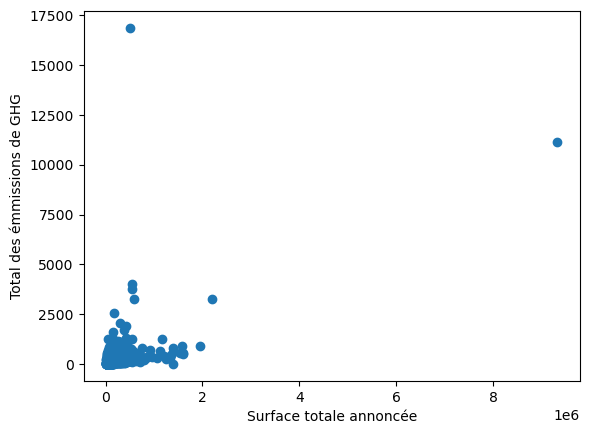

In [4]:
import matplotlib.pyplot as plt
plt.plot(data['PropertyGFATotal'], data['TotalGHGEmissions'], 'o')
plt.xlabel("Surface totale annoncée")
plt.ylabel("Total des émmissions de GHG")

In [5]:
# on a quand même deux outliers à considérer !
data['PropertyGFATotal'].describe()

count    1.536000e+03
mean     1.139607e+05
std      3.002955e+05
min      1.229400e+04
25%      2.881700e+04
50%      4.679850e+04
75%      9.875225e+04
max      9.320156e+06
Name: PropertyGFATotal, dtype: float64

In [8]:
data.loc[data['PropertyGFATotal'] > 9.0e+06, 'OSEBuildingID']

1503    49967
Name: OSEBuildingID, dtype: int64

In [9]:
data.loc[data['OSEBuildingID'] == 49967, data.columns[0:10]]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber
1503,49967,2016,Campus,University,University of Washington - Seattle Campus,NE 45th St & Brooklyn Ave,Seattle,WA,98105.0,1625049001


Ce n'est pas le même campus que pour l'outlier en emissions déjà traité, mais il gène un peu pour le graphe.
<br>Et pour l'outlier en emissions repéré par le graphe :

In [10]:
data.loc[data['TotalGHGEmissions'] > 15000, 'OSEBuildingID']

15    43
Name: OSEBuildingID, dtype: int64

Cette fois c'est notre premier campus ! (Pour lequel on a un problème avec le calcul de la surface). Tachons d'obtenir le graphe sans les outliers :

Text(0, 0.5, 'Total des émmissions de GHG')

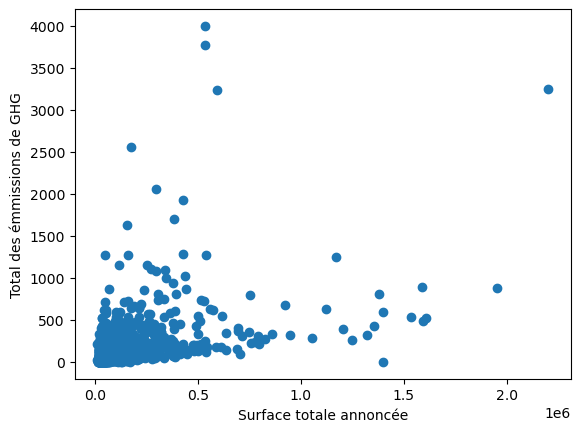

In [12]:
data_plot = data.loc[(data['OSEBuildingID'] != 43) & (data['OSEBuildingID'] != 49967), ['PropertyGFATotal','TotalGHGEmissions']]
plt.plot(data_plot['PropertyGFATotal'], data_plot['TotalGHGEmissions'], 'o')
plt.xlabel("Surface totale annoncée")
plt.ylabel("Total des émmissions de GHG")

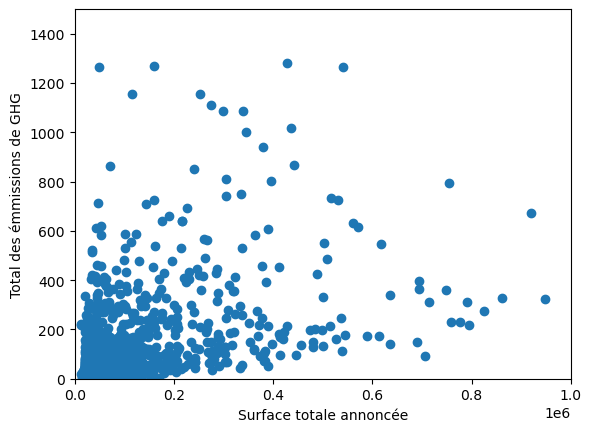

In [15]:
fig, axes = plt.subplots()
axes.plot(data_plot['PropertyGFATotal'], data_plot['TotalGHGEmissions'], 'o')
axes.set_xlim(0, 1000000)  # grâce à cette syntaxe permettant d'utiliser ces méthodes, on n'a pas besoin d'un DF réduit
axes.set_ylim(0, 1500)     # axes.ylim(0, 1500) fonctionne pareil
plt.xlabel("Surface totale annoncée")
plt.ylabel("Total des émmissions de GHG")
plt.show()

In [16]:
data.loc[data['TotalGHGEmissions'] > 1500, 'OSEBuildingID']

6          27
15         43
76        338
274       477
306       525
486       753
894     22062
969     23113
1226    25251
1469    45927
1503    49967
Name: OSEBuildingID, dtype: int64

In [19]:
data.loc[data['OSEBuildingID'] == 27, data.columns[17:27]]

,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
6,385274,0,385274,Other,Other,385274.0,NaN,NaN,NaN,NaN


In [18]:
data.loc[data['OSEBuildingID'] == 27, data.columns[0:10]]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber
6,27,2016,NonResidential,Other,King County Correctional Facility,500 5TH AVE,Seattle,WA,98104.0,0942001010


C'est une prison, hors nous avons (plus loin ci-dessous) éliminé les prisons en les considérant comme des établissements à caractère résidentiel, comme les hotels, les résidences universitaires ... Nous allons donc supprimer aussi celle-ci.

In [20]:
data.loc[data['OSEBuildingID'] == 338, data.columns[17:27]]

,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
76,299070,68432,230638,Other,Other,250000.0,NaN,NaN,NaN,NaN


In [22]:
data.loc[data['OSEBuildingID'] == 338, data.columns[0:6]]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address
76,338,2016,NonResidential,Other,Jack R. McDonald Building,1900 9th Ave.


In [23]:
data.loc[data['OSEBuildingID'] == 338, data.columns[28:]]

,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
76,NaN,261.299988,264.0,530.700012,532.299988,65336980.0,66000296.0,0.0,8983483.0,30651644.0,346853.3125,34685331.0,False,NaN,Compliant,NaN,2055.82,6.87


In [24]:
data.loc[data['OSEBuildingID'] == 477, data.columns[17:27]]

,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
274,535947,0,535947,"Other, Parking",Other,535947.0,Parking,103983.0,NaN,NaN


In [26]:
data.loc[data['OSEBuildingID'] == 477, data.columns[0:6]]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address
274,477,2016,Campus,Other,Weintraub/Hutchinson/Thomas,1100 Fairview Ave N


In [27]:
data.loc[data['OSEBuildingID'] == 525, data.columns[17:27]]

,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
306,154660,0,154660,"Data Center, Library, Non-Refrigerated Warehou...",Other - Entertainment/Public Assembly,119815.0,Other - Recreation,63101.0,Social/Meeting Hall,26380.0


In [28]:
# cette propriété présente une incohérence dans les surfaces
data.loc[data['OSEBuildingID'] == 525, data.columns[0:6]]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address
306,525,2016,NonResidential,Mixed Use Property,Seattle Art Museum,1300 1st Avenue


In [29]:
data.loc[data['OSEBuildingID'] == 753, data.columns[17:27]]

,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
486,429405,0,429405,"Data Center, Office",Data Center,218997.0,Office,210409.0,NaN,NaN


In [30]:
data.loc[data['OSEBuildingID'] == 22062, data.columns[17:27]]

,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
894,2200000,0,2200000,"College/University, Parking",College/University,1719643.0,Parking,318960.0,NaN,NaN


In [31]:
data.loc[data['OSEBuildingID'] == 23113, data.columns[17:27]]

,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
969,591981,0,591981,"Medical Office, Other/Specialty Hospital, Outp...",Medical Office,520187.0,Parking,282392.0,Other/Specialty Hospital,54159.0


In [32]:
# ci dessus également une incohérence dans les surfaces
data.loc[data['OSEBuildingID'] == 25251, data.columns[17:27]]

,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
1226,537000,0,537000,College/University,College/University,533826.0,NaN,NaN,NaN,NaN


In [33]:
data.loc[data['OSEBuildingID'] == 45927, data.columns[17:27]]

,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
1469,178000,0,178000,Laboratory,Laboratory,181930.0,NaN,NaN,NaN,NaN


In [34]:
data.loc[data['OSEBuildingID'] == 49967, data.columns[17:27]]

,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
1503,9320156,0,9320156,College/University,College/University,9320156.0,NaN,NaN,NaN,NaN


Peut-on avoir une explication des médiocres performances de ces prop. par l'année de construction ?

In [35]:
data['YearBuilt'].describe()

count    1536.000000
mean     1961.677734
std        32.334303
min      1900.000000
25%      1930.000000
50%      1965.000000
75%      1988.000000
max      2015.000000
Name: YearBuilt, dtype: float64

In [37]:
for ID in [27, 43, 338, 477, 525, 753, 22062, 23113, 25251, 45927, 49967] :
    print(str(ID) + ' -> ' + str( data.loc[data['OSEBuildingID'] == ID ,'YearBuilt'] ) )


27 -> 6    1985
Name: YearBuilt, dtype: int64
43 -> 15    1992
Name: YearBuilt, dtype: int64
338 -> 76    2004
Name: YearBuilt, dtype: int64
477 -> 274    1997
Name: YearBuilt, dtype: int64
525 -> 306    1991
Name: YearBuilt, dtype: int64
753 -> 486    1981
Name: YearBuilt, dtype: int64
22062 -> 894    1939
Name: YearBuilt, dtype: int64
23113 -> 969    1964
Name: YearBuilt, dtype: int64
25251 -> 1226    1945
Name: YearBuilt, dtype: int64
45927 -> 1469    2000
Name: YearBuilt, dtype: int64
49967 -> 1503    1900
Name: YearBuilt, dtype: int64


In [7]:
# on supprime la prison :
data = data.loc[data['OSEBuildingID'] != 27, :]
data.shape

(1535, 46)

In [39]:
# Pour nos 'hight outliers' en émission, voyons s'ils sont référencés comme tels :
for ID in [43, 338, 477, 525, 753, 22062, 23113, 25251, 45927, 49967] :
    print(str(ID) + ' -> ' + str( data.loc[data['OSEBuildingID'] == ID ,'Outlier'] ) )


43 -> 15    NaN
Name: Outlier, dtype: object
338 -> 76    NaN
Name: Outlier, dtype: object
477 -> 274    NaN
Name: Outlier, dtype: object
525 -> 306    NaN
Name: Outlier, dtype: object
753 -> 486    NaN
Name: Outlier, dtype: object
22062 -> 894    NaN
Name: Outlier, dtype: object
23113 -> 969    NaN
Name: Outlier, dtype: object
25251 -> 1226    NaN
Name: Outlier, dtype: object
45927 -> 1469    NaN
Name: Outlier, dtype: object
49967 -> 1503    NaN
Name: Outlier, dtype: object


In [41]:
data['Outlier'].value_counts()

Low outlier     13
High outlier     2
Name: Outlier, dtype: int64

J'ai déjà repéré que les 'low outliers' ne sont pas particulièrement significatifs par rapport à d'autres bâtiments qui ne le sont pas, néanmoins jetons un coup d'oeil à ceux listés (low ou high) :

In [44]:
data.loc[~data['Outlier'].isna() ,['OSEBuildingID','Outlier']]

,OSEBuildingID,Outlier
164,350,High outlier
317,539,Low outlier
380,608,Low outlier
445,704,High outlier
630,19967,Low outlier
698,20617,Low outlier
783,21315,Low outlier
825,21474,Low outlier
944,22830,Low outlier
1041,23912,Low outlier


In [49]:
for ID in data.loc[~data['Outlier'].isna() ,'OSEBuildingID'] :
    display(data.loc[data['OSEBuildingID'] == ID, data.columns[17:]])


,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
164,172842,25920,146922,"Data Center, Office, Parking",Office,99890.0,Data Center,39336.0,Parking,25000.0,...,11663150.0,39794668.0,16048.30957,1604831.0,False,NaN,Non-Compliant,High outlier,362.66,2.1


,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
317,69492,0,69492,Retail Store,Retail Store,69800.0,Other,0.0,NaN,NaN,...,93482.60156,318963.0,0.0,0.0,False,NaN,Non-Compliant,Low outlier,2.22,0.03


,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
380,154159,0,154159,Office,Office,193154.0,NaN,NaN,NaN,NaN,...,471503.0,1608768.0,3430.500488,343050.0,False,NaN,Non-Compliant,Low outlier,29.43,0.19


,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
445,129551,42500,87051,"Data Center, Office, Parking",Office,82273.0,Parking,42500.0,Data Center,4778.0,...,7953454.5,27137187.0,0.0,0.0,False,NaN,Non-Compliant,High outlier,189.18,1.46


,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
630,35805,0,35805,K-12 School,K-12 School,35805.0,NaN,NaN,NaN,NaN,...,72282.39844,246628.0,1848.439575,184844.0,True,NaN,Error - Correct Default Data,Low outlier,11.54,0.32


,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
698,39900,0,39900,"Non-Refrigerated Warehouse, Retail Store",Retail Store,25000.0,Non-Refrigerated Warehouse,15000.0,NaN,NaN,...,14362.5,49005.0,964.640015,96464.0,True,NaN,Error - Correct Default Data,Low outlier,5.46,0.14


,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
783,57720,0,57720,Office,Office,25000.0,NaN,NaN,NaN,NaN,...,7064.899902,24105.0,0.0,0.0,False,NaN,Non-Compliant,Low outlier,0.17,0.0


,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
825,49760,0,49760,Other,Other,24019.0,NaN,NaN,NaN,NaN,...,12981.7002,44294.0,0.0,0.0,False,NaN,Non-Compliant,Low outlier,0.31,0.01


,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
944,23772,0,23772,Worship Facility,Worship Facility,23772.0,NaN,NaN,NaN,NaN,...,29555.0,100842.0,0.0,0.0,False,NaN,Non-Compliant,Low outlier,0.7,0.03


,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
1041,45068,0,45068,Office,Office,45068.0,NaN,NaN,NaN,NaN,...,41554.60156,141784.0,1430.729858,143073.0,False,NaN,Non-Compliant,Low outlier,8.59,0.19


,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
1145,24152,0,24152,K-12 School,K-12 School,24152.0,NaN,NaN,NaN,NaN,...,47292.89844,161363.0,0.0,0.0,False,NaN,Non-Compliant,Low outlier,1.12,0.05


,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
1181,27690,0,27690,"Other, Parking",Other,24717.0,Parking,0.0,NaN,NaN,...,4926.399902,16809.0,0.0,0.0,False,NaN,Non-Compliant,Low outlier,0.12,0.0


,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
1192,20970,0,20970,"Office, Parking",Office,20970.0,Parking,0.0,NaN,NaN,...,34489.89844,117680.0,868.193909,86819.0,False,NaN,Non-Compliant,Low outlier,5.43,0.26


,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
1364,20039,0,20039,Worship Facility,Worship Facility,20039.0,NaN,NaN,NaN,NaN,...,30692.30078,104722.0,0.0,0.0,False,NaN,Non-Compliant,Low outlier,0.73,0.04


,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
1467,39212,0,39212,Other,Other,39212.0,NaN,NaN,NaN,NaN,...,21210.59961,72371.0,0.0,0.0,False,NaN,Non-Compliant,Low outlier,0.5,0.01


On a trouvé plusieurs outliers avec 'TotalGHGEmissions' > 1500, donc ceux qui sont marqués 'High' n'en sont pas spécialement.

In [50]:
data['TotalGHGEmissions'].describe()

count     1526.000000
mean       140.702490
std        577.429929
min         -0.800000
25%         18.622500
50%         46.095000
75%        120.825000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

Le campus correspondant au max pourrait avoir une intensité d'émission plus raisonable si sa surface était correctement saisie. Voyons ce que ça donnerait s'il avait la surface de l'autre campus : 16 871 000 / 9.32+06 ~ 0.18, ce qui est bas ! Si on lui donne la surface correspondante (seulement) aux trois premiers usages : 16 871 000 / 1 856 706 ~ 9 comme déjà vu, mais supposant que cette surface est sous-estimée j'avait mis l'intensité d'émission à 1,5.
<br>Concernant les 'low outliers', voyons combiens environ il y a vraiment :

In [4]:
data.loc[data['TotalGHGEmissions'] < 30, data.columns[27:]]

,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
9,NaN,NaN,19.500000,19.500000,61.200001,61.200001,1.310237e+06,1.310237e+06,0.0,384008.31250,1.310236e+06,0.000000,0.0000,False,NaN,Compliant,NaN,9.13,0.14
10,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.00000,0.000000e+00,0.000000,0.0000,False,NaN,Missing Data,NaN,0.00,0.00
12,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,438691.68750,1.496816e+06,0.000000,0.0000,False,NaN,Missing Data,NaN,10.43,0.20
14,NaN,NaN,12.100000,12.400000,35.200001,35.500000,3.183648e+05,3.262231e+05,0.0,82434.00000,2.812650e+05,371.000000,37100.0000,False,NaN,Compliant,NaN,3.93,0.04
29,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,176088.09380,6.008130e+05,0.000000,0.0000,False,NaN,Missing Data,NaN,4.19,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,NaN,75.0,36.799999,40.900002,115.500000,128.399994,5.026677e+05,5.585251e+05,0.0,147323.50000,5.026678e+05,0.000000,0.0000,True,NaN,Error - Correct Default Data,NaN,3.50,0.26
1529,NaN,93.0,25.200001,26.900000,64.099998,66.699997,3.878100e+05,4.141724e+05,0.0,81341.39844,2.775369e+05,1102.729980,110272.9980,True,NaN,Error - Correct Default Data,NaN,7.79,0.51
1530,NaN,NaN,51.000000,56.200001,126.000000,136.600006,9.320821e+05,1.025432e+06,0.0,185334.70310,6.323620e+05,2997.199951,299719.9951,False,NaN,Compliant,NaN,20.33,1.11
1531,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.0,153655.00000,5.242709e+05,3254.750244,325475.0244,True,NaN,Error - Correct Default Data,NaN,20.94,1.70


In [5]:
data.loc[data['TotalGHGEmissions'] < 10, data.columns[27:]]

,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
9,NaN,NaN,19.500000,19.500000,61.200001,61.200001,1.310237e+06,1.310237e+06,0.0,384008.31250,1.310236e+06,0.00000,0.000,False,NaN,Compliant,NaN,9.13,0.14
10,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.00000,0.000000e+00,0.00000,0.000,False,NaN,Missing Data,NaN,0.00,0.00
14,NaN,NaN,12.100000,12.400000,35.200001,35.500000,3.183648e+05,3.262231e+05,0.0,82434.00000,2.812650e+05,371.00000,37100.000,False,NaN,Compliant,NaN,3.93,0.04
29,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,176088.09380,6.008130e+05,0.00000,0.000,False,NaN,Missing Data,NaN,4.19,0.08
39,NaN,NaN,8.100000,8.100000,25.500000,25.500000,8.759433e+05,8.759433e+05,0.0,256724.29690,8.759430e+05,0.00000,0.000,False,NaN,Compliant,NaN,6.11,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,NaN,NaN,26.700001,28.500000,83.900002,89.599998,6.278541e+05,6.702910e+05,0.0,184013.50000,6.278540e+05,0.00000,0.000,False,NaN,Compliant,NaN,4.38,0.17
1519,NaN,77.0,29.000000,30.600000,91.099998,96.000000,1.325973e+06,1.397742e+06,0.0,388620.40630,1.325973e+06,0.00000,0.000,False,NaN,Compliant,NaN,9.24,0.21
1523,NaN,NaN,30.900000,30.900000,97.000000,97.000000,6.369655e+05,6.369655e+05,0.0,186683.90630,6.369655e+05,0.00000,0.000,False,NaN,Compliant,NaN,4.44,0.22
1526,NaN,75.0,36.799999,40.900002,115.500000,128.399994,5.026677e+05,5.585251e+05,0.0,147323.50000,5.026678e+05,0.00000,0.000,True,NaN,Error - Correct Default Data,NaN,3.50,0.26


Je ne vois pas sur quoi se base l'information du champs 'Outlier' parce que des centaines d'autres 'individus' mériteraient la mention 'Low' alors qu'ils ne l'ont pas. Nous reviendrons ultérieurement sur cette recherche, indépendement de la colonne 'Outlier' qui ne semble pas significative.<a name="E4">

Interessons nous déjà à **la sélection des batiments que nous allons utiliser pour notre étude**, qui ne concerne que ceux "non destinés à l’habitation" :

In [4]:
data['DataYear'].value_counts() # vérification de l'âge des données

2016    3376
Name: DataYear, dtype: int64

In [5]:
data['BuildingType'].value_counts()

NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: BuildingType, dtype: int64

In [7]:
data['PrimaryPropertyType'].value_counts()

Low-Rise Multifamily           987
Mid-Rise Multifamily           564
Small- and Mid-Sized Office    293
Other                          256
Warehouse                      187
Large Office                   173
K-12 School                    139
Mixed Use Property             133
High-Rise Multifamily          105
Retail Store                    91
Hotel                           77
Worship Facility                71
Distribution Center             53
Senior Care Community           45
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      25
Residence Hall                  23
Refrigerated Warehouse          12
Restaurant                      12
Hospital                        10
Laboratory                      10
Office                           3
Name: PrimaryPropertyType, dtype: int64

(1018 + 580 + 110) # (987 + 564 + 105) : Nous avons une incoherence entre ces deux champs concernant les batiments 'multifamily' (qui sont résidentiels), il va donc falloir vérifier avec les champs 'LargestPropertyUseType', 'SecondLargestPropertyUseType' ... On a aussi une incoherence entre 'NonResidential' et 'Hotel' car les hotels sont des batiments à usage résidentiel (dans lesquels il y a un grand 'turn-over' des résidents)

In [7]:
data[['PrimaryPropertyType','LargestPropertyUseType']].value_counts()

PrimaryPropertyType          LargestPropertyUseType    
Low-Rise Multifamily         Multifamily Housing           976
Mid-Rise Multifamily         Multifamily Housing           563
Small- and Mid-Sized Office  Office                        291
Warehouse                    Non-Refrigerated Warehouse    187
Large Office                 Office                        173
                                                          ... 
Other                        Fire Station                    1
Mixed Use Property           Distribution Center             1
Other                        Food Service                    1
                             Movie Theater                   1
                             Residential Care Facility       1
Length: 84, dtype: int64

In [8]:
data[['PrimaryPropertyType','LargestPropertyUseType']].value_counts()[0:25]

PrimaryPropertyType          LargestPropertyUseType               
Low-Rise Multifamily         Multifamily Housing                      976
Mid-Rise Multifamily         Multifamily Housing                      563
Small- and Mid-Sized Office  Office                                   291
Warehouse                    Non-Refrigerated Warehouse               187
Large Office                 Office                                   173
K-12 School                  K-12 School                              139
High-Rise Multifamily        Multifamily Housing                      103
Other                        Other                                     92
Retail Store                 Retail Store                              90
Hotel                        Hotel                                     76
Worship Facility             Worship Facility                          71
Distribution Center          Distribution Center                       53
Senior Care Community        Senior Care Comm

In [4]:
# On peut déjà supprimer tous les 'Multifamily', les 'Hotel', les 'Senior Care Community' et les 'Residence Hall' :
data = data.loc[data['LargestPropertyUseType'].str[0:11] != 'Multifamily',:]

In [5]:
data = data.loc[data['LargestPropertyUseType'].str[0:5] != 'Hotel',:]

In [6]:
data = data.loc[data['LargestPropertyUseType'].str[0:15] != 'Senior Care Com',:]

In [7]:
data = data.loc[data['LargestPropertyUseType'].str[0:14] != 'Residence Hall',:]

In [13]:
data[['PrimaryPropertyType','LargestPropertyUseType']].value_counts()[0:25]

PrimaryPropertyType          LargestPropertyUseType               
Small- and Mid-Sized Office  Office                                   291
Warehouse                    Non-Refrigerated Warehouse               187
Large Office                 Office                                   173
K-12 School                  K-12 School                              139
Other                        Other                                     92
Retail Store                 Retail Store                              90
Worship Facility             Worship Facility                          71
Distribution Center          Distribution Center                       53
Supermarket / Grocery Store  Supermarket/Grocery Store                 39
Medical Office               Medical Office                            39
Mixed Use Property           Office                                    31
Self-Storage Facility        Self-Storage Facility                     27
Other                        Other - Recreati

In [6]:
data[['PrimaryPropertyType','LargestPropertyUseType']].value_counts()[25:50]

PrimaryPropertyType  LargestPropertyUseType                         
Other                Manufacturing/Industrial Plant                     8
                     Repair Services (Vehicle, Shoe, Locksmith, etc)    6
                     Other - Lodging/Residential                        6
                     Strip Mall                                         5
                     Automobile Dealership                              5
                     Museum                                             5
Mixed Use Property   Other - Recreation                                 5
Other                Other - Services                                   5
                     Other - Mall                                       4
                     Other/Specialty Hospital                           4
                     Financial Office                                   4
                     Urgent Care/Clinic/Other Outpatient                4
                     Library               

In [9]:
# on supprime aussi les hopitaux et les prisons, qui sont des batiments à caractère résidentiel :
data = data.loc[data['LargestPropertyUseType'].str[0:8] != 'Hospital',:]
data = data.loc[data['LargestPropertyUseType'].str[0:6] != 'Prison',:]

In [8]:
data[['PrimaryPropertyType','LargestPropertyUseType']].value_counts()[45:]

PrimaryPropertyType          LargestPropertyUseType                              
Other                        Other - Utility                                         2
                             Lifestyle Center                                        2
                             Other - Public Services                                 2
                             Other - Education                                       2
Mixed Use Property           Other - Education                                       2
                             Restaurant                                              2
                             Social/Meeting Hall                                     2
                             Supermarket/Grocery Store                               2
Other                        Adult Education                                         2
Mixed Use Property           Medical Office                                          2
                             Fitness Center/Heal

In [11]:
# la suppression du 'Residential Care Facility' termine ce premier nettoyage :
# data = data.loc[data['LargestPropertyUseType'].astype('string') != 'Residential Care Facility',:]
# ci-dessus problème, enlève bien plus de lignes qu'attendu
data = data.loc[data['LargestPropertyUseType'].str[0:25] != 'Residential Care Facility',:]

In [13]:
# regardons un peu les batiments utilisés partiellement comme résidence, pour estimer si on les garde :
data['SecondLargestPropertyUseType'].value_counts()

Parking                                                 292
Office                                                  162
Retail Store                                             83
Other                                                    45
Non-Refrigerated Warehouse                               30
Restaurant                                               26
Fitness Center/Health Club/Gym                           16
Multifamily Housing                                      15
Data Center                                              13
Other - Services                                         11
Laboratory                                                8
Distribution Center                                       7
Medical Office                                            7
Supermarket/Grocery Store                                 7
Bank Branch                                               6
Other - Entertainment/Public Assembly                     5
K-12 School                             

In [17]:
data.loc[data['SecondLargestPropertyUseType'].astype('string') == 'Residence Hall/Dormitory', data.columns[19:29]]

,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore
103,50292,"Non-Refrigerated Warehouse, Office, Other - Se...",Non-Refrigerated Warehouse,42345.0,Residence Hall/Dormitory,5000.0,Office,4730.0,NaN,NaN


In [18]:
# pour le batiment ci-dessus la partie résidentielle fait moins de 10% de la surface totale, donc on le garde.
data.loc[data['SecondLargestPropertyUseType'].astype('string') == 'Hospital (General Medical & Surgical)', data.columns[19:29]]

,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore
1498,267470,"Hospital (General Medical & Surgical), Other",Other,160482.0,Hospital (General Medical & Surgical),106988.0,NaN,NaN,NaN,NaN


Pour le batiment ci-dessus la partie à caractère résidentielle fait 40% de la surface totale et on ne sait pas comment est utilisé le reste (peut être des logements pour le personnel hospitalier ...), donc on supprime ce batiment

In [13]:
# data = data.loc[data['SecondLargestPropertyUseType'].astype('string') != 'Hospital (General Medical & Surgical)', :]
# ci-dessus, même probleme que déjà vu
data = data.loc[data['SecondLargestPropertyUseType'].str[0:37] != 'Hospital (General Medical & Surgical)',:]

In [15]:
data.loc[data['SecondLargestPropertyUseType'].astype('string') == 'Multifamily Housing', data.columns[19:27]]

,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
488,516407,"Financial Office, Hotel, Multifamily Housing, ...",Parking,385196.0,Multifamily Housing,340236.0,Hotel,67627.0
511,130550,"Multifamily Housing, Non-Refrigerated Warehous...",Office,80157.0,Multifamily Housing,34302.0,Parking,26937.0
541,89893,"Multifamily Housing, Non-Refrigerated Warehous...",Non-Refrigerated Warehouse,58605.0,Multifamily Housing,24338.0,Retail Store,18864.0
760,30700,"Multifamily Housing, Other",Other,19034.0,Multifamily Housing,11666.0,NaN,NaN
912,20539,"Medical Office, Multifamily Housing, Office, R...",Retail Store,7387.0,Multifamily Housing,5264.0,Restaurant,3700.0
922,29636,"Multifamily Housing, Other - Entertainment/Pub...",Other - Entertainment/Public Assembly,25096.0,Multifamily Housing,4540.0,NaN,NaN
1167,22388,"Multifamily Housing, Office",Office,19600.0,Multifamily Housing,2788.0,NaN,NaN
1315,29340,"Multifamily Housing, Office, Restaurant",Office,12714.0,Multifamily Housing,11592.0,Restaurant,2836.0
1484,490053,"Multifamily Housing, Parking, Retail Store",Parking,124061.0,Multifamily Housing,116794.0,Retail Store,54555.0
1773,111137,"Bank Branch, Multifamily Housing, Office, Othe...",Office,42939.0,Multifamily Housing,40878.0,Bank Branch,10887.0


Pour le premier, la partie résidentielle totale est supérieure à la partie parking, donc on ne va pas le garder.
<br>Pour le deuxième, la partie résidentielle représente seulement un peu plus du quart, donc on le garde comme 'non résid.'
<br>Pour le troisième, à peu prés comme ci dessus
<br>Pour le quatrième, un bon tiers en résidentielle, le reste non connu donc on ne va pas le garder.
<br>Pour le cinquième, la partie résidentielle représente seulement à peine le quart, donc on le garde comme 'non résid.'
<br>Pour le sixième, ~pareil que ci-dessus
<br>Pour le septième, ~pareil que ci-dessus
<br>Pour le huitième, un bon tiers en résidentielle, le reste relativement résidentiel aussi, on ne le garde pas.
<br>Pour le neuvième, partie résidentielle bien minoritaire, donc on le garde comme 'non résid.'
<br>Pour le dixième, un bon tiers en résidentielle, le reste relativement résidentiel aussi, on ne le garde pas.
<br>Pour le onzième, 37% en résidentielle, le reste parking et un peu de bureaux. c'est un peu limite, c'est quand même plutôt résidentiel donc on ne le garde pas. ("PropertyGFABuilding(s)" à corriger : ne peut pas être < la somme des surfaces détaillées)
<br>Pour le douzième, 31% en résidentielle, le reste self-stockage et magasin. Cette mixité à taux résidentiel important risque de perturber la cohérence générale, on ne le garde pas.
<br>Pour le treizième, la partie résidentielle est largement minoritaire, donc on le garde.
<br>Pour le quatorzième, ensemble plutôt résidentiel, on ne le garde pas.
<br>Pour le quinzième, idem ci-dessus.
<br>En conclusion on supprime les lignes 425, 760, 1315, 1773, 1947, 2169, 2791, 3163.

In [16]:
for indic in [425, 760, 1315, 1773, 1947, 2169, 2791, 3163] :
    data = data.drop(index=indic, axis=0)

In [18]:
data.loc[data['SecondLargestPropertyUseType'].astype('string') == 'Hotel', data.columns[19:27]]

,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
1162,20516,"Hotel, Retail Store",Retail Store,10155.0,Hotel,8000.0,NaN,NaN
3192,43832,"Hotel, Parking, Retail Store",Retail Store,24588.0,Hotel,17558.0,Parking,1686.0


In [19]:
# nous supprimons ces deux batiments à caractère plutôt résidentiel :
data = data.drop(index=1162, axis=0)
data = data.drop(index=3192, axis=0)

In [21]:
# eventuellement un dernier ?
data.loc[data['SecondLargestPropertyUseType'].astype('string') == 'Other - Lodging/Residential', data.columns[19:27]]

,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
731,21600,"Office, Other - Lodging/Residential",Office,14400.0,Other - Lodging/Residential,7200.0,NaN,NaN


In [22]:
# plutôt résidentiel, on l'enlève :
data = data.drop(index=731, axis=0)

In [23]:
data.shape

(1536, 46)

In [24]:
data.reset_index(drop=True)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,9,2016,Nonresidential COS,Other,West Precinct,810 Virginia St,Seattle,WA,98101.0,0660000560,...,2.160444e+06,7.371434e+06,47151.816410,4.715182e+06,False,NaN,Compliant,NaN,301.81,3.10
1,11,2016,NonResidential,Other,Paramount Theatre,911 Pine St,Seattle,WA,98101.0,0660000955,...,1.065843e+06,3.636655e+06,3851.890137,3.851890e+05,False,NaN,Compliant,NaN,221.51,2.16
2,21,2016,Nonresidential COS,Other,The Seattle Public Library - Central Library,1000 Fourth Avenue,Seattle,WA,98154.0,0942000275,...,5.231916e+06,1.785130e+07,0.000000,0.000000e+00,False,NaN,Compliant,NaN,181.38,0.44
3,22,2016,NonResidential,Other,Downtown Seattle YMCA,909 4th Avenue,Seattle,WA,98104.0,0942000350,...,1.305354e+06,4.453868e+06,9101.799805,9.101800e+05,False,NaN,Compliant,NaN,433.86,4.18
4,24,2016,NonResidential,Mixed Use Property,The Rainier Club,820 4th Ave.,Seattle,WA,98104.0,0942000510,...,1.103397e+06,3.764791e+06,20650.912110,2.065091e+06,False,NaN,Compliant,NaN,273.02,4.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
1532,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
1533,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99
1534,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57


In [30]:
data.to_csv('2016_Building_Energy_Benchmarking.csv')

Revenons sur l'étude des **données énergétiques**, après nous être assurés que nous n'avons que des 'individus' uniques : <a name="E5">

In [16]:
data.loc[data['OSEBuildingID'].duplicated(keep=False),:]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity


In [17]:
data.loc[data[['PropertyName','Address','ZipCode']].duplicated(keep=False),:]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity


In [18]:
# Y-a-t-il beaucoup de commentaires laissés par les propriétaires ?
data['Comments'].count()

0

Les champs qui vous nous interesser principalement, ceux que nous devrons prédire par la suite, sont 'SiteEnergyUseWN(kBtu)' et 'TotalGHGEmissions'. Ils ont l'avantage de ne pas dépendre de la surface qui présente des incohérences, ni des conditions météo pour le premier (dommage pour le deuxième ...).
<br>Tachons de mettre en évidences quelques corrélations avec les autres données, et éventuellement détecter des anomalies. Pour commencer, vérifions les niveaux de remplissage : 

In [19]:
# que nous reste-t-il comme PrimaryPropertyType, et est il donné pour tous les individus ?
data['PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    292
Other                          248
Warehouse                      186
Large Office                   173
K-12 School                    139
Mixed Use Property             100
Retail Store                    89
Worship Facility                71
Distribution Center             53
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      25
Refrigerated Warehouse          12
Restaurant                      12
Low-Rise Multifamily            11
Laboratory                      10
Office                           3
High-Rise Multifamily            2
Hotel                            1
Mid-Rise Multifamily             1
Name: PrimaryPropertyType, dtype: int64

In [21]:
data['PrimaryPropertyType'].count()

1535

In [4]:
# On a encore des 'Multifamily' !?
#data.loc[str(data['PrimaryPropertyType']).strip().endswith('Multifamily'), data.columns[0:5]]
#data.loc[str(data['PrimaryPropertyType']).find('Multifamily'), data.columns[0:5]]
data.loc[data['PrimaryPropertyType'].str[0:20] == 'Low-Rise Multifamily', data.columns[0:5]]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName
601,19798,2016,Multifamily LR (1-4),Low-Rise Multifamily,SANDHURST APTS
991,23355,2016,Multifamily LR (1-4),Low-Rise Multifamily,GRAHAM VIEW
998,23437,2016,Multifamily LR (1-4),Low-Rise Multifamily,MERCER CREST APT
1223,25431,2016,Multifamily LR (1-4),Low-Rise Multifamily,PONDERAY APTS
1231,25302,2016,Multifamily LR (1-4),Low-Rise Multifamily,Maria Chalet
1273,25752,2016,Multifamily LR (1-4),Low-Rise Multifamily,GRANVIEW APARTMENTS
1274,25763,2016,Multifamily LR (1-4),Low-Rise Multifamily,Villa Andora
1289,26026,2016,Multifamily LR (1-4),Low-Rise Multifamily,Westwood Plaza Condominiums
1380,27343,2016,Multifamily LR (1-4),Low-Rise Multifamily,Ravenna Woods
1423,27966,2016,Multifamily LR (1-4),Low-Rise Multifamily,Pinehurst Lane


In [5]:
# On les supprime :
data = data.loc[data['PrimaryPropertyType'].str[0:20] != 'Low-Rise Multifamily', :]

In [6]:
data.loc[data['PrimaryPropertyType'].str[0:21] == 'High-Rise Multifamily', data.columns[0:5]]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName
709,20762,2016,Multifamily HR (10+),High-Rise Multifamily,The Concord
985,23319,2016,Multifamily HR (10+),High-Rise Multifamily,Kelleher House


In [7]:
data = data.loc[data['PrimaryPropertyType'].str[0:21] != 'High-Rise Multifamily', :]

In [8]:
data.loc[data['PrimaryPropertyType'].str[0:20] == 'Mid-Rise Multifamily', data.columns[0:5]]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName
889,21950,2016,Multifamily MR (5-9),Mid-Rise Multifamily,500 ELLIOTT HOMES CONDOMINIUM


In [9]:
data = data.loc[data['PrimaryPropertyType'].str[0:20] != 'Mid-Rise Multifamily', :]

In [10]:
data.loc[data['PrimaryPropertyType'].str[0:5] == 'Hotel', data.columns[0:5]]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName
740,21103,2016,NonResidential,Hotel,Palladian Hotel


In [11]:
data = data.loc[data['PrimaryPropertyType'].str[0:5] != 'Hotel', :]

In [12]:
data.shape

(1520, 46)

In [13]:
data.reset_index(drop=True)
data.to_csv('2016_Building_Energy_Benchmarking.csv')

In [14]:
# Sur les 1520, quelle est la part ayant un seul type d'usage ?
data.loc[data['SecondLargestPropertyUseType'].isna() & data['ThirdLargestPropertyUseType'].isna(), 'OSEBuildingID'].count()

739

In [15]:
# réponse : une petite moitié. Continuons la vérification les niveaux de remplissage :
data['PropertyGFATotal'].count()

1520

In [16]:
# même s'il y a quelques doutes, on a quand même globalement une bonne information de la surface totale
data['PropertyGFABuilding(s)'].count()

1520

In [17]:
data.loc[data['PropertyGFATotal'] == data['PropertyGFABuilding(s)'], 'City'].count()

1237

In [19]:
display(data['SiteEUI(kBtu/sf)'].count())
display(data['SiteEUIWN(kBtu/sf)'].count())

1517

1517

In [20]:
display(data['SourceEUI(kBtu/sf)'].count())
display(data['SourceEUIWN(kBtu/sf)'].count())
display(data['SiteEnergyUse(kBtu)'].count())
display(data['SiteEnergyUseWN(kBtu)'].count())

1518

1518

1518

1517

In [21]:
# quels sont les batiments qui n'ont pas ces données ?
data.loc[data['SiteEUI(kBtu/sf)'].isna(), 'OSEBuildingID']

238       435
505       773
1318    26532
Name: OSEBuildingID, dtype: int64

In [23]:
display(data.loc[data['OSEBuildingID'] == 435, data.columns[0:5]])
display(data.loc[data['OSEBuildingID'] == 773, data.columns[0:5]])
display(data.loc[data['OSEBuildingID'] == 26532, data.columns[0:5]])

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName
238,435,2016,NonResidential,Other,Washington State Convention Center


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName
505,773,2016,NonResidential,Small- and Mid-Sized Office,SEATTLE BUILDING


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName
1318,26532,2016,NonResidential,Mixed Use Property,KALBERG BUILDING


In [25]:
display(data.loc[data['OSEBuildingID'] == 435, data.columns[29:41]])
display(data.loc[data['OSEBuildingID'] == 773, data.columns[29:41]])
display(data.loc[data['OSEBuildingID'] == 26532, data.columns[29:41]])

,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData
238,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData
505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData
1318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [26]:
display(data.loc[data['OSEBuildingID'] == 435, data.columns[14:27]])
display(data.loc[data['OSEBuildingID'] == 773, data.columns[14:27]])
display(data.loc[data['OSEBuildingID'] == 26532, data.columns[14:27]])

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
238,1990,1.0,6,1400000,0,1400000,"Convention Center, Parking",Convention Center,1072000.0,Parking,686750.0,NaN,NaN


,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
505,1924,NaN,4,63150,0,63150,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
1318,1928,NaN,2,20760,0,20760,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On ne va pas pouvoir garder ces batiments pour l'apprentissage d'un modèle, mais pourquoi pas pour l'évaluer. Pour le 435 on constate des incohérences sur les surfaces. Je sauvegarde ces individus avant de les supprimer du DF de travail.

In [27]:
df_miss = data.loc[data['SiteEUI(kBtu/sf)'].isna(), :]
df_miss.to_csv('Building_missing_Energy_info.csv')
data = data.loc[~data['SiteEUI(kBtu/sf)'].isna(), :]
data.shape

(1517, 46)

In [28]:
data['DefaultData'].value_counts()

False    1429
True       88
Name: DefaultData, dtype: int64

In [29]:
display(data['TotalGHGEmissions'].count())
display(data['GHGEmissionsIntensity'].count())

1517

1517

In [4]:
data['LargestPropertyUseType'].value_counts()

Office                                                  493
Non-Refrigerated Warehouse                              198
K-12 School                                             139
Other                                                    99
Retail Store                                             97
Worship Facility                                         71
Distribution Center                                      54
Medical Office                                           41
Supermarket/Grocery Store                                41
Other - Recreation                                       31
Parking                                                  31
Self-Storage Facility                                    27
College/University                                       25
Other - Entertainment/Public Assembly                    21
Laboratory                                               13
Restaurant                                               12
Refrigerated Warehouse                  

In [6]:
data['LargestPropertyUseType'].count()

1514

In [7]:
# il y en a trois qui n'ont pas cette info., lesquels, et quels sont leurs 'PrimaryPropertyType' ?
data.loc[data['LargestPropertyUseType'].isna(), ['PrimaryPropertyType','OSEBuildingID']]

,PrimaryPropertyType,OSEBuildingID
285,Self-Storage Facility,496
1242,Small- and Mid-Sized Office,25568
1258,Restaurant,25711


In [8]:
display(data.iloc[285,0])
display(data.iloc[1242,0])
display(data.iloc[1258,0])

496

25568

25711

In [10]:
# On va donc renseigner ces trois manquants :
data.iloc[285,21] = 'Self-Storage Facility'
data.iloc[1242,21] = 'Office'
data.iloc[1258,21] = 'Restaurant'

In [12]:
# observons la relation entre des batiments d'un même et unique type d'usage et la consommation, par ex. pour les entrepôts :
entrepots = data.loc[(data['LargestPropertyUseType'] == 'Non-Refrigerated Warehouse') & \
                     (data['SecondLargestPropertyUseType'].isna()) & (data['ThirdLargestPropertyUseType'].isna()), :]
entrepots.shape

(100, 46)

Text(0, 0.5, 'Consomation totale du site')

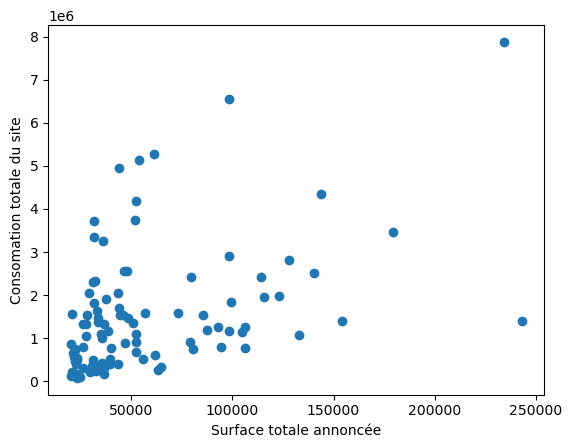

In [13]:
import matplotlib.pyplot as plt
plt.plot(entrepots['PropertyGFATotal'], entrepots['SiteEnergyUseWN(kBtu)'], 'o')
plt.xlabel("Surface totale annoncée")
plt.ylabel("Consomation totale du site")

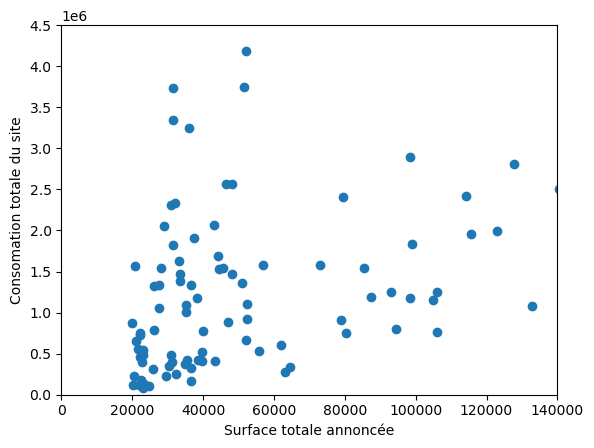

In [14]:
# bon, pas très linéaire ! Voyons sans les 'outliers' :
fig, axes = plt.subplots()
axes.plot(entrepots['PropertyGFATotal'], entrepots['SiteEnergyUseWN(kBtu)'], 'o')
axes.set_xlim(0, 140000)
axes.set_ylim(0, 4500000)
plt.xlabel("Surface totale annoncée")
plt.ylabel("Consomation totale du site")
plt.show()

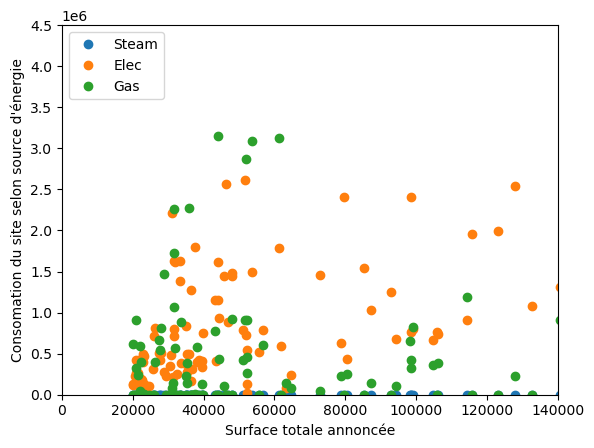

In [16]:
# l'explication de 'cette pagaille' reside peut-être dans les formes d'énergies utilisés ?
fig, axes = plt.subplots()
axes.plot(entrepots['PropertyGFATotal'], entrepots['SteamUse(kBtu)'], 'o', label='Steam')
axes.plot(entrepots['PropertyGFATotal'], entrepots['Electricity(kBtu)'], 'o', label='Elec')
axes.plot(entrepots['PropertyGFATotal'], entrepots['NaturalGas(kBtu)'], 'o', label='Gas')
axes.set_xlim(0, 140000)
axes.set_ylim(0, 4500000)
plt.xlabel("Surface totale annoncée")
plt.ylabel("Consomation du site selon source d'énergie")
plt.legend()
plt.show()

In [17]:
# toujours bien 'en vrac', essayons de voir l'influence du nombre d'étages :
entrepots['NumberofFloors'].value_counts()

1    69
2    16
4     8
3     4
5     2
7     1
Name: NumberofFloors, dtype: int64

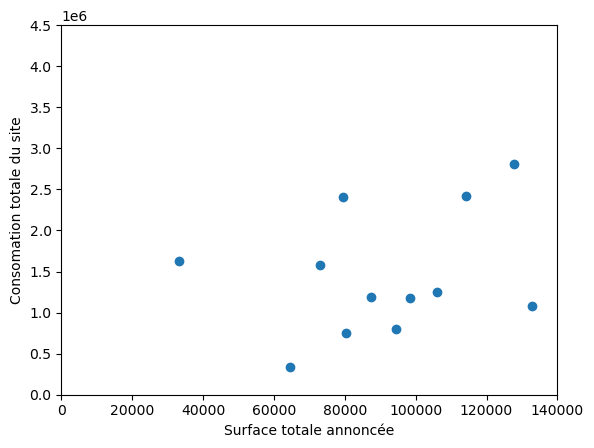

In [18]:
H_entrepots = entrepots.loc[entrepots['NumberofFloors'] > 2, :]
fig, axes = plt.subplots()
axes.plot(H_entrepots['PropertyGFATotal'], H_entrepots['SiteEnergyUseWN(kBtu)'], 'o')
axes.set_xlim(0, 140000)
axes.set_ylim(0, 4500000)
plt.xlabel("Surface totale annoncée")
plt.ylabel("Consomation totale du site")
plt.show()

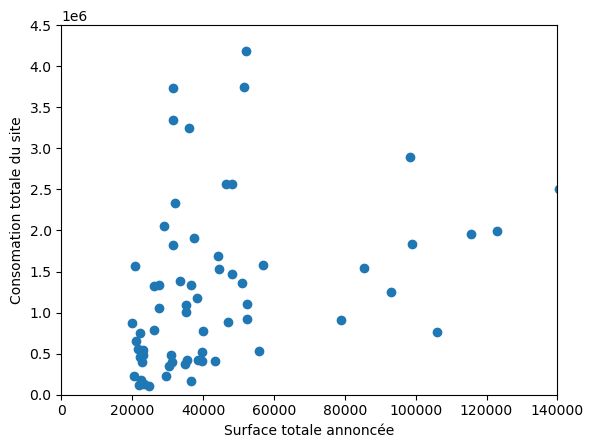

In [19]:
L_entrepots = entrepots.loc[entrepots['NumberofFloors'] == 1, :]
fig, axes = plt.subplots()
axes.plot(L_entrepots['PropertyGFATotal'], L_entrepots['SiteEnergyUseWN(kBtu)'], 'o')
axes.set_xlim(0, 140000)
axes.set_ylim(0, 4500000)
plt.xlabel("Surface totale annoncée")
plt.ylabel("Consomation totale du site")
plt.show()

In [20]:
# la linéarité à laquelle on pouvait s'attendre reste très faible. Il semble rester des batiments résidentiels :
data.loc[data['LargestPropertyUseType'] == 'Other - Lodging/Residential', ['PrimaryPropertyType','OSEBuildingID']]

,PrimaryPropertyType,OSEBuildingID
70,Other,180
1023,Other,23863
1314,Other,26659
1323,Other,26711
1339,Other,26905
1390,Other,27816


In [21]:
# data.loc[data['OSEBuildingID'] == 43, data.columns[17:28]]
for ID in [180, 23863, 26659, 26711, 26905, 27816] :
    display(data.loc[data['OSEBuildingID'] == ID, ['OSEBuildingID','PropertyName','SecondLargestPropertyUseType',\
                                                   'ThirdLargestPropertyUseType']])

,OSEBuildingID,PropertyName,SecondLargestPropertyUseType,ThirdLargestPropertyUseType
70,180,Hope Place,Office,Food Service


,OSEBuildingID,PropertyName,SecondLargestPropertyUseType,ThirdLargestPropertyUseType
1023,23863,William Booth Center,Parking,NaN


,OSEBuildingID,PropertyName,SecondLargestPropertyUseType,ThirdLargestPropertyUseType
1314,26659,Sigma Chapter of Alpha Phi Holding Inc.,NaN,NaN


,OSEBuildingID,PropertyName,SecondLargestPropertyUseType,ThirdLargestPropertyUseType
1323,26711,Men's Shelter,NaN,NaN


,OSEBuildingID,PropertyName,SecondLargestPropertyUseType,ThirdLargestPropertyUseType
1339,26905,Kappa Alpha Theta,NaN,NaN


,OSEBuildingID,PropertyName,SecondLargestPropertyUseType,ThirdLargestPropertyUseType
1390,27816,Son Shone Inn,NaN,NaN


In [22]:
for ID in [180, 23863, 26659, 26711, 26905, 27816] :
    display(data.loc[data['OSEBuildingID'] == ID, ['LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA',\
                                                   'ThirdLargestPropertyUseTypeGFA']])

,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
70,46483.0,37938.0,4579.0


,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
1023,43336.0,4500.0,NaN


,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
1314,22232.0,NaN,NaN


,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
1323,29820.0,NaN,NaN


,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
1339,20686.0,NaN,NaN


,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
1390,25200.0,NaN,NaN


Le premier est majoritairement une résidence à caractère humanitaire, donc assimilable à une résidence
<br>Le deuxième est principalement un centre d'hébergement temporaire pour nécéssiteux, donc assimilable à une résidence.
<br>Le troisième est une résidence universitaire pour étudiantes
<br>Le quatrième est une résidence temporaire pour hommes SDF
<br>Le cinquième est un centre d'étudiantes mais on ne sait pas quelle est la part d'hébergement, donc on va le garder
<br>Le sixième semble être un hotel

In [23]:
data = data.drop(index=70, axis=0)
data = data.drop(index=1023, axis=0)
data = data.drop(index=1314, axis=0)
data = data.drop(index=1323, axis=0)
data = data.drop(index=1390, axis=0)
data.reset_index(drop=True)
data.to_csv('2016_Building_Energy_Benchmarking.csv')
data.shape

(1512, 46)

In [4]:
# Après les entrepots, un coup d'oeil sur, par exemple, les 'K-12 School' :
schools = data.loc[(data['LargestPropertyUseType'] == 'K-12 School') & (data['SecondLargestPropertyUseType'].isna()) \
                   & (data['ThirdLargestPropertyUseType'].isna()), :]
schools.shape

(135, 46)

Text(0, 0.5, 'Consomation totale du site')

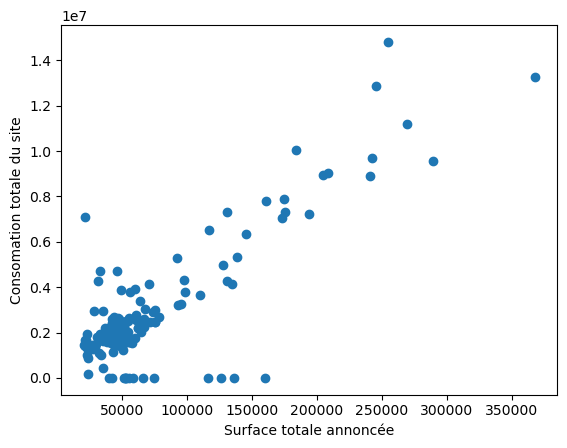

In [8]:
import matplotlib.pyplot as plt
plt.plot(schools['PropertyGFATotal'], schools['SiteEnergyUseWN(kBtu)'], 'o')
plt.xlabel("Surface totale annoncée")
plt.ylabel("Consomation totale du site")

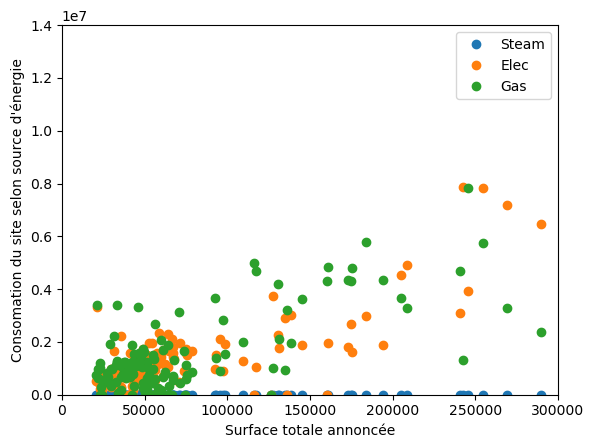

In [6]:
# c'est plus ordonné que les entrepots !
fig, axes = plt.subplots()
axes.plot(schools['PropertyGFATotal'], schools['SteamUse(kBtu)'], 'o', label='Steam')
axes.plot(schools['PropertyGFATotal'], schools['Electricity(kBtu)'], 'o', label='Elec')
axes.plot(schools['PropertyGFATotal'], schools['NaturalGas(kBtu)'], 'o', label='Gas')
axes.set_xlim(0, 300000)
axes.set_ylim(0, 14000000)
plt.xlabel("Surface totale annoncée")
plt.ylabel("Consomation du site selon source d'énergie")
plt.legend()
plt.show()

Nous constatons plus clairement que l'utilisation de la vapeur (Centrale à vapeur de Seattle) est très économe. Pour les autres sources, on a une linéarité, pas très bonne mais claire quand même. Dommage que le fuel domestique (heating oil) ne soit pas repporté, c'est probablement une source largement utilisée. Ce qui est clair aussi, c'est qu'un modèle linéaire basique ne sera pas assez complexe pour de bonnes performances dans les prédictions souhaitées.